Student ID: 23036883

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# Load the dataset

In [ ]:
df = pd.read_csv('/kaggle/input/penguins/penguins.csv')

# Data Cleaning

In [ ]:
# Drop rows with missing values
df = df.dropna()

# Encode the 'species' column
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
# Convert inf values to NaN
df = df.replace([np.inf, -np.inf], np.nan)

# K-means Clustering

In [ ]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df['cluster'] = kmeans.fit_predict(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# Boxplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

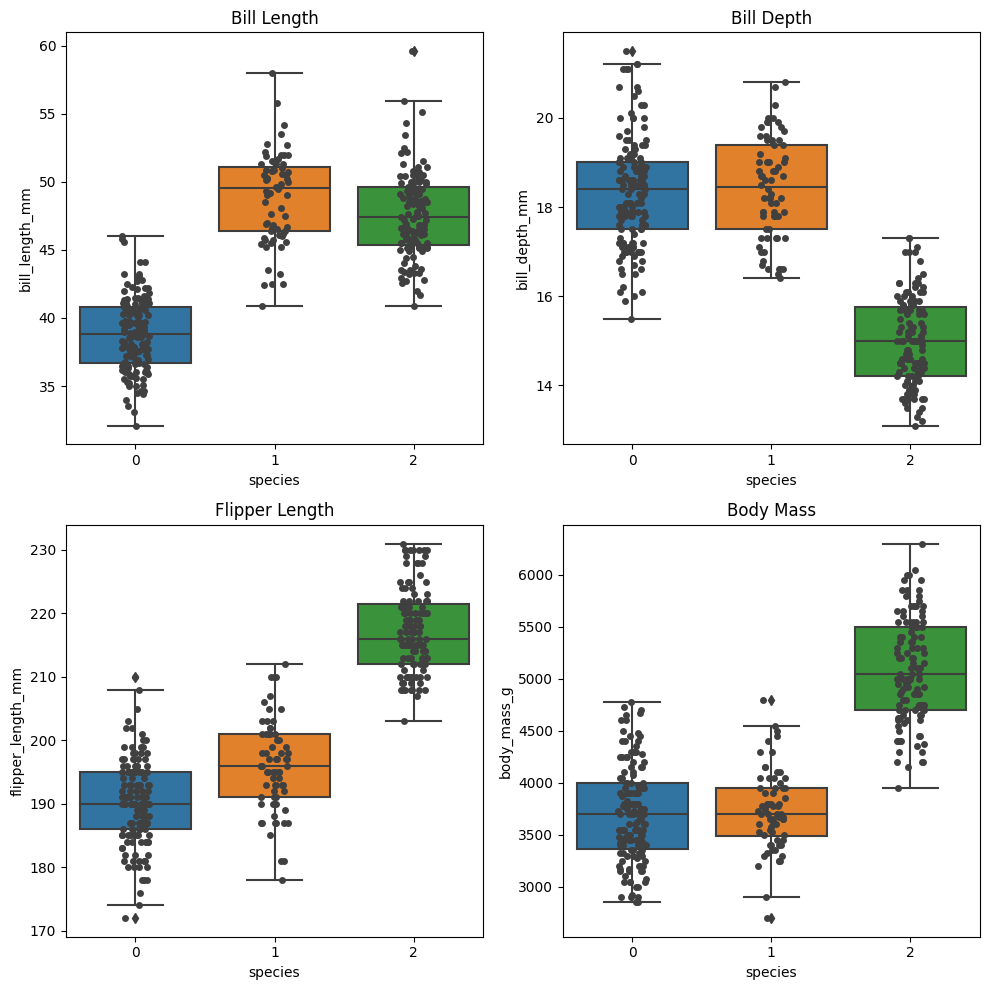

In [ ]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create boxplots with jitter
sns.boxplot(x='species', y='bill_length_mm', data=df, ax=axs[0, 0])
sns.stripplot(x='species', y='bill_length_mm', data=df, color=".25", ax=axs[0, 0])
axs[0, 0].set_title('Bill Length')

sns.boxplot(x='species', y='bill_depth_mm', data=df, ax=axs[0, 1])
sns.stripplot(x='species', y='bill_depth_mm', data=df, color=".25", ax=axs[0, 1])
axs[0, 1].set_title('Bill Depth')

sns.boxplot(x='species', y='flipper_length_mm', data=df, ax=axs[1, 0])
sns.stripplot(x='species', y='flipper_length_mm', data=df, color=".25", ax=axs[1, 0])
axs[1, 0].set_title('Flipper Length')

sns.boxplot(x='species', y='body_mass_g', data=df, ax=axs[1, 1])
sns.stripplot(x='species', y='body_mass_g', data=df, color=".25", ax=axs[1, 1])
axs[1, 1].set_title('Body Mass')

# Display the plots
plt.tight_layout()
plt.show()

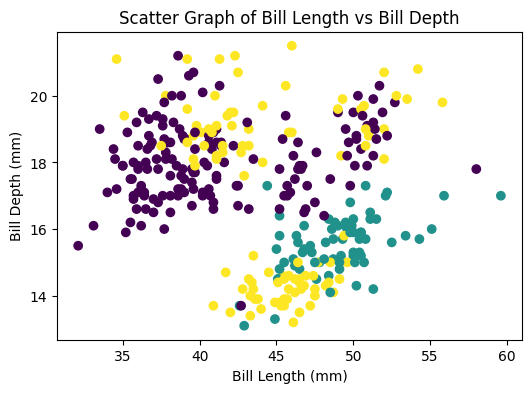

In [ ]:
# Plot a scatter graph for 'bill_length_mm' vs 'bill_depth_mm'
plt.figure(figsize=(6, 4))
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'], c=df['cluster'])
plt.title('Scatter Graph of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

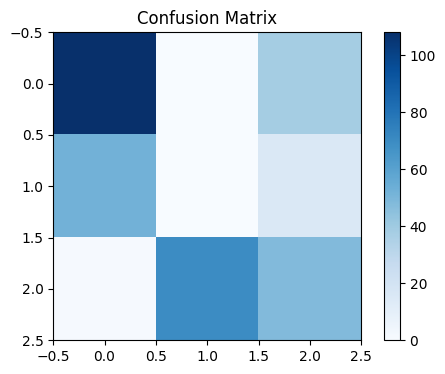

In [ ]:
# Plot a confusion matrix
cm = confusion_matrix(df['species'], df['cluster'])
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

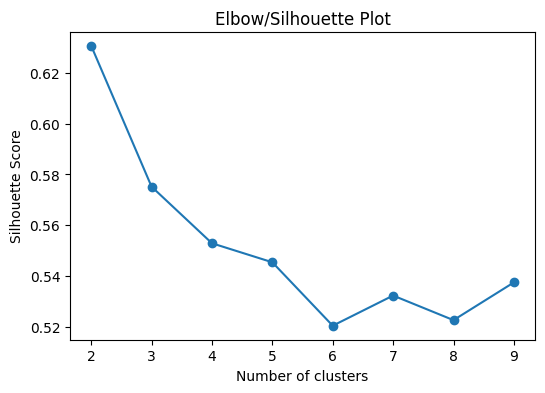

In [ ]:
# Calculate silhouette scores for different numbers of clusters and plot
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
    silhouette_scores.append(silhouette_score(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']], kmeans.labels_))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Elbow/Silhouette Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

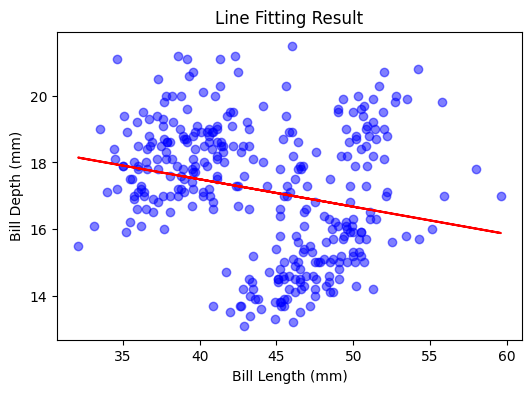

In [ ]:
# Perform line fitting on 'bill_length_mm' and 'bill_depth_mm' using linear regression
lr = LinearRegression()
lr.fit(df[['bill_length_mm']], df['bill_depth_mm'])
df['predicted_bill_depth'] = lr.predict(df[['bill_length_mm']])

# Plot the line fitting result
plt.figure(figsize=(6, 4))
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'], color='blue', alpha=0.5)
plt.plot(df['bill_length_mm'], df['predicted_bill_depth'], color='red')
plt.title('Line Fitting Result')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()